## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2022-12-15 16:09:46.960627: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
/end/home/rh2310/.conda/envs/tensorflow.2.3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/end/home/rh2310/.conda/envs/tensorflow.2.3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[2]

[1,
 53,
 12,
 284,
 15,
 14,
 272,
 26,
 53,
 959,
 32,
 818,
 15,
 14,
 272,
 26,
 39,
 684,
 70,
 11,
 14,
 12,
 3886,
 18,
 180,
 183,
 187,
 70,
 11,
 14,
 102,
 32,
 11,
 29,
 53,
 44,
 704,
 15,
 14,
 19,
 758,
 15,
 53,
 959,
 47,
 1013,
 15,
 14,
 19,
 132,
 15,
 39,
 965,
 32,
 11,
 14,
 147,
 72,
 11,
 180,
 183,
 187,
 44,
 11,
 14,
 102,
 19,
 11,
 123,
 186,
 90,
 67,
 960,
 4,
 78,
 13,
 68,
 467,
 511,
 110,
 59,
 89,
 90,
 67,
 1390,
 55,
 2678,
 92,
 617,
 80,
 1274,
 46,
 905,
 220,
 13,
 4,
 346,
 48,
 235,
 629,
 5,
 211,
 5,
 1118,
 7,
 2,
 81,
 5,
 187,
 11,
 15,
 9,
 1709,
 201,
 5,
 47,
 3615,
 18,
 478,
 4514,
 5,
 1118,
 7,
 232,
 2,
 71,
 5,
 160,
 63,
 11,
 9,
 2,
 81,
 5,
 102,
 59,
 11,
 17,
 12]

**Decoding newswires back to text**

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [13]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [18]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [26]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [28]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [30]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

2022-12-15 16:22:20.171632: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-12-15 16:22:20.491626: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:2d:00.0 name: Quadro RTX 6000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.65GiB deviceMemoryBandwidth: 625.94GiB/s
2022-12-15 16:22:20.491649: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-12-15 16:22:20.493259: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2022-12-15 16:22:20.494982: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcufft.so.10
2022-12-15 16:22:20.495259: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcurand.so.10
2

**Compiling the model**

<h2><center> $L = -\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{L} y_{ij} \log(P(y_{ij})) $</center></h2>

In [31]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [32]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [33]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2022-12-15 16:23:56.920763: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10


16/16 [==============================] - 0s 20ms/step - loss: 2.5488 - accuracy: 0.5331 - val_loss: 1.7244 - val_accuracy: 0.6340
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 1.4309 - accuracy: 0.7005 - val_loss: 1.3326 - val_accuracy: 0.7020
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.0802 - accuracy: 0.7687 - val_loss: 1.1630 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8552 - accuracy: 0.8206 - val_loss: 1.0551 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6793 - accuracy: 0.8583 - val_loss: 0.9851 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5445 - accuracy: 0.8874 - val_loss: 0.9275 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.4333 - accuracy: 0.9078 - val_loss: 0.9013 - val_accuracy: 0.8160
Epoch 8/20
16/16 [======

**Plotting the training and validation loss**

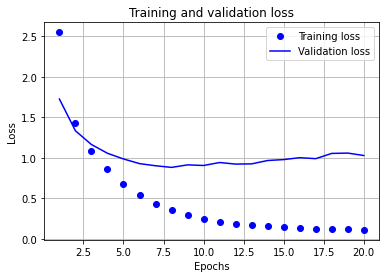

In [34]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

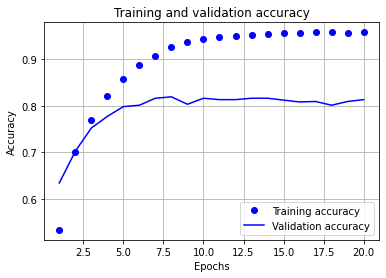

In [35]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

**Retraining a model from scratch**

In [36]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 0s 9ms/step - loss: 2.5318 - accuracy: 0.5412
Epoch 2/9
18/18 [==============================] - 0s 9ms/step - loss: 1.3110 - accuracy: 0.7308
Epoch 3/9
18/18 [==============================] - 0s 9ms/step - loss: 0.9805 - accuracy: 0.7943
Epoch 4/9
18/18 [==============================] - 0s 9ms/step - loss: 0.7702 - accuracy: 0.8392
Epoch 5/9
18/18 [==============================] - 0s 9ms/step - loss: 0.6122 - accuracy: 0.8737
Epoch 6/9
18/18 [==============================] - 0s 9ms/step - loss: 0.4927 - accuracy: 0.8980
Epoch 7/9
18/18 [==============================] - 0s 9ms/step - loss: 0.3937 - accuracy: 0.9173
Epoch 8/9
18/18 [==============================] - 0s 8ms/step - loss: 0.3211 - accuracy: 0.9306
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9600 - accuracy: 0.7916


In [45]:
results

[0.9711029529571533, 0.784060537815094]

# A baseline estimate after randomly shuffling the labels

In [40]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.195013357079252

### Generating predictions on new data

In [41]:
predictions = model.predict(x_test)

In [46]:
np.argmax(predictions[0])

4

In [53]:
test_labels[0]

3

In [51]:
predictions_label = np.argmax(predictions, axis=1)


In [54]:
hits_array2 = np.array(test_labels) == np.array(predictions_label)
hits_array2.mean()

0.7916295636687445